# Summary: <br>data processing with SQLAlchemy

<p>
The first part of this project SQLAlchemy is used to import the database data with the Sqlite adapter into Pandas dataframes. Several methods for this purpose are explored. The second part of this 
project is applying queries to the Northwind-data. Several 
options of SQL are explored. A particular focus is set on joining of tables.
</p>


<p>
"<b>SQLAlchemy</b> is the Python SQL toolkit and Object Relational Mapper that gives application developers the full power and flexibility of SQL.
It provides a full suite of well known enterprise-level persistence patterns, designed for efficient and high-performing database access, adapted into a simple and Pythonic domain language."<br>
<a href="https://www.sqlalchemy.org/" target="_blank">sqlalchemy</a> 
</p>

<p>The database used here is the Northwind database in the SQLite format.<br>
A relationship diagram of Northwind is shown below.</p>



<img src="images/north.png" 
alt="Smiley face" height="600" width="600">   

# Import packages
### Core packages

In [252]:
import pandas as pd 
import pandasql
from pandasql import sqldf
import os

import matplotlib.pyplot as plt


In [253]:
cwd=os.getcwd()
#cwd

### Database packages: sqlalchemy

In [254]:
from sqlalchemy import create_engine
import sqlalchemy as alchemy
from sqlalchemy.inspection import inspect
from sqlalchemy.orm import sessionmaker
from sqlalchemy import MetaData, Table


# Database processing with SQL Alchemy
### Syntax of the SQLalchemy process

<ul>
  <li>from sqlalchemy import create_engine</li>
  <li>engine = create_engine('sqlite:///database.sqlite'</li>
  <li>connection = engine.connect()</li>
  <li>query = "SELECT * FROM table"</li>
  <li>result_proxy = connection.execute(query)</li>
  <li>result = result_proxy.fetchall()</li>
</ul> 

### Making a session

In [255]:
# Session = sessionmaker()
# engine = create_engine(CONNECTION_STRING)
# Session.configure(bind=engine)

### Creating the connection<br>between databases and Python objects (e.g. Pandas df)

In [256]:
# SQLAlchemy connectable
north_engine = \
create_engine('sqlite:///databasefiles/Northwind/Northwind_small.sqlite')

In [257]:
north_engine

Engine(sqlite:///databasefiles/Northwind/Northwind_small.sqlite)

In [258]:
north_connection = north_engine.connect()
north_connection 

<p>What is in the database?</p>

### Getting table information

<p>In sqlite calling the master gets the table names.</p>

In [259]:
north_tables = \
north_connection.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in north_tables.fetchall():
    print(name[0])

Employee
Category
Customer
Shipper
Supplier
Order
Product
OrderDetail
CustomerCustomerDemo
CustomerDemographic
Region
Territory
EmployeeTerritory


In [260]:
north_inspector = inspect(north_connection)
north_inspector.get_table_names()

['Category',
 'Customer',
 'CustomerCustomerDemo',
 'CustomerDemographic',
 'Employee',
 'EmployeeTerritory',
 'Order',
 'OrderDetail',
 'Product',
 'Region',
 'Shipper',
 'Supplier',
 'Territory']

<p>The inspect module of SQL alchemy makes it easier to get the 
information.</p>

In [261]:
north_inspector.get_columns('EmployeeTerritory')

[{'name': 'Id',
  'type': VARCHAR(length=8000),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'EmployeeId',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'TerritoryId',
  'type': VARCHAR(length=8000),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [262]:
north_inspector.get_columns('Product')

[{'name': 'Id',
  'type': INTEGER(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'ProductName',
  'type': VARCHAR(length=8000),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'SupplierId',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'CategoryId',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'QuantityPerUnit',
  'type': VARCHAR(length=8000),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'UnitPrice',
  'type': DECIMAL(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'UnitsInStock',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'UnitsOnOrder',
  'type': INTEGER(),
  'n

In [263]:
# north_inspector.get_columns('Supplier')

#### Metadata

In [264]:
# from sqlalchemy import MetaData, Table
metadata_1 = MetaData()
order_1 = Table('Order', metadata_1, autoload=True,
                 autoload_with=north_engine)

print(repr(order_1))

Table('Order', MetaData(), Column('Id', INTEGER(), table=<Order>, primary_key=True), Column('CustomerId', VARCHAR(length=8000), table=<Order>), Column('EmployeeId', INTEGER(), table=<Order>, nullable=False), Column('OrderDate', VARCHAR(length=8000), table=<Order>), Column('RequiredDate', VARCHAR(length=8000), table=<Order>), Column('ShippedDate', VARCHAR(length=8000), table=<Order>), Column('ShipVia', INTEGER(), table=<Order>), Column('Freight', DECIMAL(), table=<Order>, nullable=False), Column('ShipName', VARCHAR(length=8000), table=<Order>), Column('ShipAddress', VARCHAR(length=8000), table=<Order>), Column('ShipCity', VARCHAR(length=8000), table=<Order>), Column('ShipRegion', VARCHAR(length=8000), table=<Order>), Column('ShipPostalCode', VARCHAR(length=8000), table=<Order>), Column('ShipCountry', VARCHAR(length=8000), table=<Order>), schema=None)


### Importing into Pandas
#### Importing with execute & pd.DataFrame
<p>The conn.execute function results in tuples.<br>
Here fetchmany is used to limit the number of records imported.</p>

In [265]:
many_employees=\
north_connection.execute("select * from Employee").fetchmany(50)

many_employees[0]

(1, 'Davolio', 'Nancy', 'Sales Representative', 'Ms.', '1980-12-08', '2024-05-01', '507 - 20th Ave. E. Apt. 2A', 'Seattle', 'North America', '98122', 'USA', '(206) 555-9857', '5467', None, "Education includes a BA in psychology from Colorado State University in 1970.  She also completed 'The Art of the Cold Call.'  Nancy is a member of Toastmasters International.", 2, 'http://accweb/emmployees/davolio.bmp')

In [266]:
many_employees_colnames=many_employees[0].keys()
many_employees_colnames

RMKeyView(['Id', 'LastName', 'FirstName', 'Title', 'TitleOfCourtesy', 'BirthDate', 'HireDate', 'Address', 'City', 'Region', 'PostalCode', 'Country', 'HomePhone', 'Extension', 'Photo', 'Notes', 'ReportsTo', 'PhotoPath'])

In [267]:
many_employees_df=\
pd.DataFrame(many_employees, columns=many_employees_colnames)

many_employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               9 non-null      int64  
 1   LastName         9 non-null      object 
 2   FirstName        9 non-null      object 
 3   Title            9 non-null      object 
 4   TitleOfCourtesy  9 non-null      object 
 5   BirthDate        9 non-null      object 
 6   HireDate         9 non-null      object 
 7   Address          9 non-null      object 
 8   City             9 non-null      object 
 9   Region           9 non-null      object 
 10  PostalCode       9 non-null      object 
 11  Country          9 non-null      object 
 12  HomePhone        9 non-null      object 
 13  Extension        9 non-null      object 
 14  Photo            0 non-null      object 
 15  Notes            9 non-null      object 
 16  ReportsTo        8 non-null      float64
 17  PhotoPath        9 n

#### Importing with pd.read_sql_table 
<p>using conn as an argument.</p>

In [268]:
employee = pd.read_sql_table('Employee', north_connection)
print(employee.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               9 non-null      int64  
 1   LastName         9 non-null      object 
 2   FirstName        9 non-null      object 
 3   Title            9 non-null      object 
 4   TitleOfCourtesy  9 non-null      object 
 5   BirthDate        9 non-null      object 
 6   HireDate         9 non-null      object 
 7   Address          9 non-null      object 
 8   City             9 non-null      object 
 9   Region           9 non-null      object 
 10  PostalCode       9 non-null      object 
 11  Country          9 non-null      object 
 12  HomePhone        9 non-null      object 
 13  Extension        9 non-null      object 
 14  Photo            0 non-null      object 
 15  Notes            9 non-null      object 
 16  ReportsTo        8 non-null      float64
 17  PhotoPath        9 n

## Querying
<p>
There are several to query a database on basis of SQLalchemy.<br>
Some are discussed here:
</p>

<ul>
  <li>SQL Alchemy functions</li>
  <li>SQL Alchemy execute</li>
  <li>pd.read_sql_query</li>
  <li>Pandas SQL</li>
</ul> 
    
<p>
For the main second part of this project querying 
the Northwind database in depth "pd.read_sql_query" is applied here.
</p>


### Querying databases <br>using the SQLalchemy functions



In [269]:
metadata_2 = MetaData()
order = \
Table('order', metadata_2, autoload=True, autoload_with=north_engine)

<p>Select</p>

In [270]:
order_1_query = alchemy.select([order])
print(type(order_1_query))

<class 'sqlalchemy.sql.selectable.Select'>


In [271]:
import warnings

def function():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    function()
    order_result = north_engine.execute(order_1_query).fetchmany(100)

print(type(order_result))
print(type(order_result[0]))

<class 'list'>
<class 'sqlalchemy.engine.row.LegacyRow'>


In [272]:
print(order_result[1])

(10249, 'TOMSP', 6, '2012-07-05', '2012-08-16', '2012-07-10', 1, Decimal('11.6100000000'), 'Toms Spezialitäten', 'Luisenstr. 48', 'Münster', 'Western Europe', '44087', 'Germany')


In [273]:
print(order_result[0].keys())

RMKeyView(['Id', 'CustomerId', 'EmployeeId', 'OrderDate', 'RequiredDate', 'ShippedDate', 'ShipVia', 'Freight', 'ShipName', 'ShipAddress', 'ShipCity', 'ShipRegion', 'ShipPostalCode', 'ShipCountry'])


<p>Where</p>

In [274]:
country_query = \
alchemy.select([order]).where(order.columns.ShipCountry == 'Italy')

country_result = north_engine.execute(country_query ).fetchmany(100)

In [275]:
print(type(country_result))
print(type(country_result[0]))
print(country_result[:2])


<class 'list'>
<class 'sqlalchemy.engine.row.LegacyRow'>
[(10275, 'MAGAA', 1, '2012-08-07', '2012-09-04', '2012-08-09', 1, Decimal('26.9300000000'), 'Magazzini Alimentari Riuniti', 'Via Ludovico il Moro 22', 'Bergamo', 'Southern Europe', '24100', 'Italy'), (10288, 'REGGC', 4, '2012-08-23', '2012-09-20', '2012-09-03', 1, Decimal('7.4500000000'), 'Reggiani Caseifici', 'Strada Provinciale 124', 'Reggio Emilia', 'Southern Europe', '42100', 'Italy')]


<p>Group by</p>

In [276]:
country_query_2 = \
alchemy.select([alchemy.func.count(order.columns.Id).label('Count'),
                order.columns.ShipCountry]).\
                group_by(order.columns.ShipCountry)

country_result_2 = \
north_engine.execute(country_query_2).fetchall()

print(type(country_result_2))
print(country_result_2[:4])


<class 'list'>
[(16, 'Argentina'), (40, 'Austria'), (19, 'Belgium'), (83, 'Brazil')]


In [277]:
orders_country= \
pd.DataFrame(country_result_2, columns=['Orders', 'Country']).\
sort_values(by='Orders', ascending=False)

orders_country = orders_country.loc[:, ['Country', 'Orders']]

orders_country.head(4)

,Country,Orders
19,USA,122
8,Germany,122
3,Brazil,83
7,France,77


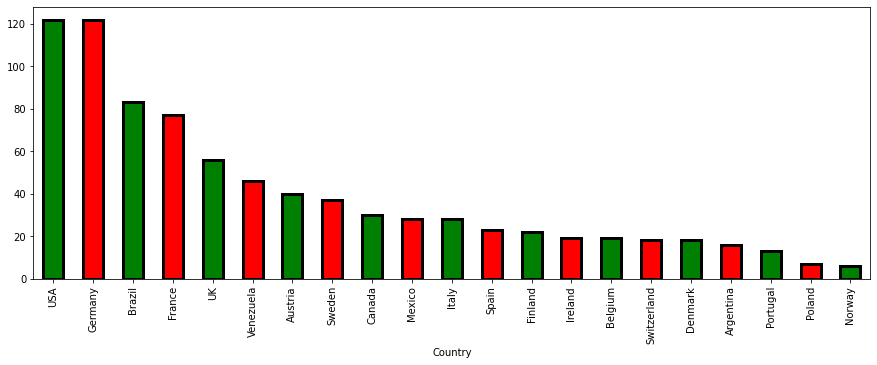

In [278]:
orders_country.plot.bar(x='Country', figsize=(15,5), 
                        color =['g','r'] , y='Orders',
                        legend=False, edgecolor='black', linewidth=3)
plt.show()

<p>
Alternatively you can put the query directly into the engine, which raises the question if the Alchemy functions are really necessary.
</p>

### SQL Alchemy execute


In [279]:
territory_result = \
north_engine.execute("select * from Territory" ).fetchall()

print(type(territory_result))
print(type(territory_result[0]))

print(territory_result[1])
print(territory_result[0].keys())

<class 'list'>
<class 'sqlalchemy.engine.row.LegacyRow'>
('01730', 'Bedford', 1)
RMKeyView(['Id', 'TerritoryDescription', 'RegionId'])


#### Further modifications with Pandas merge

In [280]:
territory_df = \
pd.DataFrame(territory_result, 
             columns=['Id', 'TerritoryDescription', 'RegionId'])

print(territory_df.info())
territory_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    53 non-null     object
 1   TerritoryDescription  53 non-null     object
 2   RegionId              53 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ KB
None


,Id,TerritoryDescription,RegionId
0,01581,Westboro,1
1,01730,Bedford,1
2,01833,Georgetow,1
3,02116,Boston,1
4,02139,Cambridge,1


In [281]:
eterritory_result = \
north_engine.execute("select * from EmployeeTerritory" ).fetchall()

print(type(eterritory_result))
print(type(eterritory_result[0]))

print(eterritory_result[1])
print(eterritory_result[0].keys())

eterritory_df = \
pd.DataFrame(eterritory_result, 
             columns=['Id', 'EmployeeId', 'TerritoryId'])

print(eterritory_df.info())

<class 'list'>
<class 'sqlalchemy.engine.row.LegacyRow'>
('1/19713', 1, '19713')
RMKeyView(['Id', 'EmployeeId', 'TerritoryId'])
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           49 non-null     object
 1   EmployeeId   49 non-null     int64 
 2   TerritoryId  49 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
None


In [282]:
print("eterritory df")
print("--------------")
eterritory_df.head()

eterritory df
--------------


,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581
3,2/01730,2,01730
4,2/01833,2,01833


<p>Id of eterritory concatenates of RegionID and TerritoryID.</p>

In [283]:
df_merge_eterritory =\
territory_df.merge(eterritory_df, 
                   left_on='Id',
                   right_on="TerritoryId", how='inner',
                   suffixes=("_territory", "_eterritory"),
                   indicator=True
                  )

print("Merged dataframe")
print("___________________")
df_merge_eterritory.head()

Merged dataframe
___________________


,Id_territory,TerritoryDescription,RegionId,Id_eterritory,EmployeeId,TerritoryId,_merge
0,01581,Westboro,1,2/01581,2,01581,both
1,01730,Bedford,1,2/01730,2,01730,both
2,01833,Georgetow,1,2/01833,2,01833,both
3,02116,Boston,1,2/02116,2,02116,both
4,02139,Cambridge,1,2/02139,2,02139,both


<p>Cols with the same name in both df are distinguished with a suffix.<br>
Here: Id_territory, Id_eterritory.</p>

### Pandas SQL

<p>
allows to get subsets from a data frame by applying SQL queries.
</p>

In [284]:
terri_q_2 = \
"""select count(distinct(TerritoryDescription)) as unique_territories
from territory_df"""

terri_q_2_view = sqldf(terri_q_2, globals())

terri_q_2_view

,unique_territories
0,52


<p>The main focus is set below on pd.read_sql_query</p>

## Querying the Northwind database with <br>Pandas using the SQLalchemy engine connection & native SQL queries

### Building a northwind class
<p>for streamling the query-process</p>

In [285]:
class north_query:   
    """
    Builds instances adapted to the Northwind database
        Attributes:
        name: the designation of the query
        Functions:
        query: conduct the query, the connection is fixed
        glimpse: infos about the pd df
    """

    def __init__(self, name, result='x'):
        self.name = name
        self.result = result
        
    def query(self, query):
        result = pd.read_sql_query(query, con = north_engine)
        global result_input
        result_input = result
        
        print(f'Object of {type(result)} is created.')
        
        return result
    
    def glimpse(self, df = "placeholder"):
        
        self.df = result_input
        return type(self.df), self.df.info(), self.df.head(2)
        
    

In [286]:
# help(north_query)

In [287]:
orderDetails_instance_1 = north_query("orderDetails_instance")

print(orderDetails_instance_1)
print(orderDetails_instance_1.name)

orderDetails_instance


In [288]:
orderDetails_instance_query = \
"select * from OrderDetail where UnitPrice >= 100"

orderDetails_1_results =\
orderDetails_instance_1.query(orderDetails_instance_query)

# orderDetails_1_results.head(1)
# orderDetails_1_results.info()

Object of <class 'pandas.core.frame.DataFrame'> is created.


In [289]:
orderDetails_instance_1.glimpse()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         46 non-null     object 
 1   OrderId    46 non-null     int64  
 2   ProductId  46 non-null     int64  
 3   UnitPrice  46 non-null     float64
 4   Quantity   46 non-null     int64  
 5   Discount   46 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 2.3+ KB


(pandas.core.frame.DataFrame,
 None,
          Id  OrderId  ProductId  UnitPrice  Quantity  Discount
 0  10329/38    10329         38      210.8        20      0.05
 1  10351/38    10351         38      210.8        20      0.05)

### Select

In [290]:
orderDetails_1 = \
pd.read_sql_query('Select Id, UnitPrice, Quantity from OrderDetail',
                   con = north_engine)

orderDetails_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         2155 non-null   object 
 1   UnitPrice  2155 non-null   float64
 2   Quantity   2155 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 50.6+ KB


## Joins
### Inner joins

In [291]:
join_1 = \
"select o.Id as OrderDetailID, o.UnitPrice, \
 o.Quantity, p.Id as ProductID, p.ProductName, \
 o.UnitPrice * o.Quantity as FullPrice \
 from OrderDetail as o \
 inner join Product as p on p.Id == o.ProductId "

join_1_df = \
pd.read_sql_query(join_1, con=north_engine)

In [292]:
reorder_columns_1 = \
['ProductName', 'ProductID', 'Quantity',
'UnitPrice','FullPrice', 'OrderDetailID']

join_12=join_1_df[reorder_columns_1]
join_12.head()

,ProductName,ProductID,Quantity,UnitPrice,FullPrice,OrderDetailID
0,Queso Cabrales,11,12,14.0,168.0,10248/11
1,Singaporean Hokkien Fried Mee,42,10,9.8,98.0,10248/42
2,Mozzarella di Giovanni,72,5,34.8,174.0,10248/72
3,Tofu,14,9,18.6,167.4,10249/14
4,Manjimup Dried Apples,51,40,42.4,1696.0,10249/51


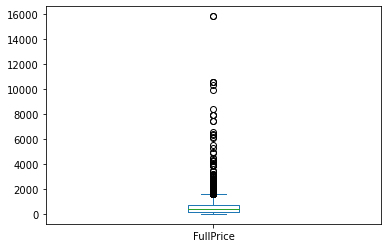

In [293]:
join_12.FullPrice.plot.box()
plt.show()

### Left join

<p>Same as above but with a left join.</p>

In [294]:
join_left = \
"select o.Id as OrderDetailID, o.UnitPrice, \
 o.Quantity, p.Id as ProductID, p.ProductName, \
 o.UnitPrice * o.Quantity as FullPrice \
 from OrderDetail as o \
 left join Product as p on p.Id == o.ProductId "

join_left_df = \
pd.read_sql_query(join_left, con=north_engine)

join_left_df=join_left_df[reorder_columns_1]
join_left_df.head()

,ProductName,ProductID,Quantity,UnitPrice,FullPrice,OrderDetailID
0,Queso Cabrales,11,12,14.0,168.0,10248/11
1,Singaporean Hokkien Fried Mee,42,10,9.8,98.0,10248/42
2,Mozzarella di Giovanni,72,5,34.8,174.0,10248/72
3,Tofu,14,9,18.6,167.4,10249/14
4,Manjimup Dried Apples,51,40,42.4,1696.0,10249/51


<p>There should be some na-values, if the data is not perfectly 
aligned with the primary and foreign keys. In the Northwind database
this is not the case.</p>

In [295]:
join_left_df.isna().sum()

ProductName      0
ProductID        0
Quantity         0
UnitPrice        0
FullPrice        0
OrderDetailID    0
dtype: int64

<p>What are the product with the highest revenue?</p>

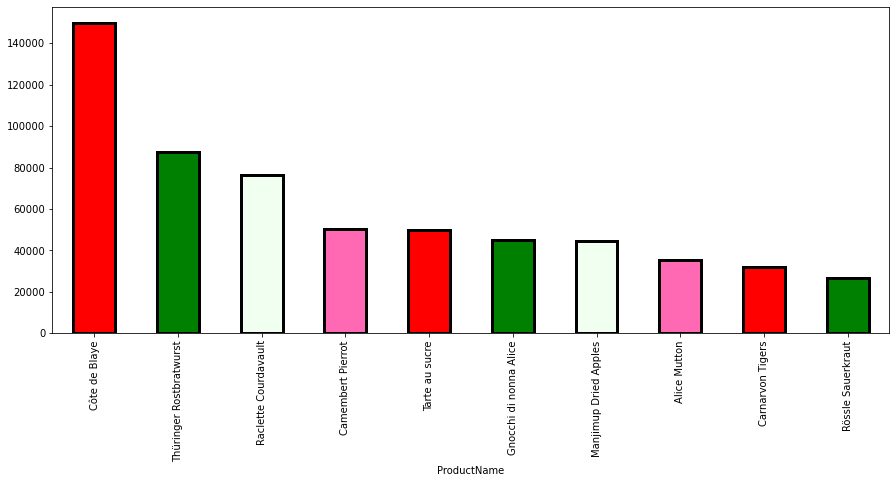

In [296]:
product_gb=\
join_left_df.groupby('ProductName')['FullPrice'].sum().sort_values(ascending=False)

product_gb[:10]
product_gb[:10].plot(kind='bar', 
                     color=['r', 'g', 'honeydew', 'hotpink'],
                     edgecolor='black', linewidth=3,
                     figsize=(15,6))
plt.show()

### Right join

<p>
produces an error:<br>
OperationalError: (sqlite3.OperationalError) RIGHT and FULL OUTER JOINs are not currently supported
</p>


<p>
Work around is to switch tables and do a left join.
</p>


In [297]:
# north_inspector.get_columns('Territory')
# north_inspector.get_columns('Employee')
# north_inspector.get_columns('Supplier')

In [298]:
join_right_pseudo = \
"select e.Id as EmployeeID, e.FirstName, e.LastName, \
 t.TerritoryId as ETerritoryId , x.Id as TerritoryId\
 from Employee as e \
 left join  EmployeeTerritory as t on \
 t.EmployeeId = e.id  \
 left join Territory as x on \
 x.Id = t.TerritoryId;"

join_right_pseudo_instance = north_query('join_right_pseudo')
print(join_right_pseudo_instance.name)

join_right_pseudo_instance_df = \
join_right_pseudo_instance.query(join_right_pseudo)
# join_right_pseudo_instance.glimpse()

join_right_pseudo_instance_df.head(5)

join_right_pseudo
Object of <class 'pandas.core.frame.DataFrame'> is created.


,EmployeeID,FirstName,LastName,ETerritoryId,TerritoryId
0,1,Nancy,Davolio,06897,06897
1,1,Nancy,Davolio,19713,19713
2,2,Andrew,Fuller,01581,01581
3,2,Andrew,Fuller,01730,01730
4,2,Andrew,Fuller,01833,01833


### Full join

<p>
OperationalError:<br>(sqlite3.OperationalError) 
RIGHT and FULL OUTER JOINs are not currently supported.
</p>

In [299]:
join_full = "select p.SupplierId, s.Id \
             from Product as p \
             left join Supplier as s \
             on s.Id = p.SupplierId"

join_full_instance = north_query('join_full')
print(join_full_instance.name)

join_full_instance_df = \
join_full_instance.query(join_full)

join_full_instance_df.head(2)

join_full
Object of <class 'pandas.core.frame.DataFrame'> is created.


,SupplierId,Id
0,1,1
1,1,1


### Join with 3 tables

<p>amended with a where-clause.</p>

In [300]:
join_2 = \
"select p.ID as ProductID, \
 p.SupplierID, \
 o.ID as OrderID, \
 p.ProductName, \
 s.CompanyName, \
 o.UnitPrice, \
 o.Quantity \
 from Product as p \
 inner join OrderDetail as o  \
 on p.ID == o.ProductID \
 inner join Supplier as s \
 on s.ID == p.SupplierID \
 where o.UnitPrice > 30"

join_2_df = \
pd.read_sql_query(join_2, con=north_engine)

join_2_df.info()
join_2_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    622 non-null    int64  
 1   SupplierId   622 non-null    int64  
 2   OrderID      622 non-null    object 
 3   ProductName  622 non-null    object 
 4   CompanyName  622 non-null    object 
 5   UnitPrice    622 non-null    float64
 6   Quantity     622 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 34.1+ KB


,ProductID,SupplierId,OrderID,ProductName,CompanyName,UnitPrice,Quantity
0,72,14,10248/72,Mozzarella di Giovanni,Formaggi Fortini s.r.l.,34.8,5
1,51,24,10249/51,Manjimup Dried Apples,"G'day, Mate",42.4,40
2,51,24,10250/51,Manjimup Dried Apples,"G'day, Mate",42.4,35


### Self joins

In [301]:
self_join = "select x.city as city_x, y.city as city_y, x.region \
             from Customer as x \
             inner join Customer as y \
             on x.region = y.region"

In [302]:
customer_selfjoin_instance = north_query("customer_selfjoin")

print(customer_selfjoin_instance)
print(type(customer_selfjoin_instance))

<class '__main__.north_query'>


In [303]:
customer_selfjoin_results =\
customer_selfjoin_instance.query(self_join)

Object of <class 'pandas.core.frame.DataFrame'> is created.


In [304]:
customer_selfjoin_instance.glimpse()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   city_x  1511 non-null   object
 1   city_y  1511 non-null   object
 2   Region  1511 non-null   object
dtypes: object(3)
memory usage: 35.5+ KB


(pandas.core.frame.DataFrame,
 None,
    city_x  city_y          Region
 0  Berlin  Aachen  Western Europe
 1  Berlin  Berlin  Western Europe)

In [305]:
customer_selfjoin_results.tail(5)

,city_x,city_y,Region
1506,Seattle,Walla Walla,North America
1507,Helsinki,Helsinki,Scandinavia
1508,Helsinki,Oulu,Scandinavia
1509,Helsinki,Stavern,Scandinavia
1510,Warszawa,Warszawa,Eastern Europe


In [306]:
product_agg_instance = north_query("product_agg")

print(product_agg_instance.name)

product_agg


In [307]:
product_agg_q = \
"select min(UnitPrice), max(UnitPrice), avg(UnitPrice) \
 from Product"

product_agg_view = product_agg_instance.query(product_agg_q)
product_agg_instance.glimpse()

Object of <class 'pandas.core.frame.DataFrame'> is created.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   min(UnitPrice)  1 non-null      float64
 1   max(UnitPrice)  1 non-null      float64
 2   avg(UnitPrice)  1 non-null      float64
dtypes: float64(3)
memory usage: 152.0 bytes


(pandas.core.frame.DataFrame,
 None,
    min(UnitPrice)  max(UnitPrice)  avg(UnitPrice)
 0             2.5           263.5       28.866364)

### Cross joins

<p>
of all possible combinations between two keys.
</p>

<p>
Here it is a combination of the product 
name "Mozzarella di Giovanni" with all supplier companies.<br>
This does not mean the supplier companies are the producer of
"Mozzarella di Giovanni". It is here simply an arrangement without meaning.
</p>

In [308]:
# north_inspector.get_columns('Customer')
# north_inspector.get_columns('Order')
# north_inspector.get_columns('Supplier')

In [309]:
cross_join = "select p.ProductName, p.SupplierId as SupplierProductID,\
             s.Id as SupplierSupplierId, \
             s.CompanyName \
             from Product as p \
             cross join Supplier as s \
             where p.ProductName = 'Mozzarella di Giovanni'\
             "

cross_join_instance = north_query('cross_join')
print(cross_join_instance.name)

cross_join_instance_df = \
cross_join_instance.query(cross_join)

cross_join_instance_df.head(5)

cross_join
Object of <class 'pandas.core.frame.DataFrame'> is created.


,ProductName,SupplierProductID,SupplierSupplierId,CompanyName
0,Mozzarella di Giovanni,14,1,Exotic Liquids
1,Mozzarella di Giovanni,14,2,New Orleans Cajun Delights
2,Mozzarella di Giovanni,14,3,Grandma Kelly's Homestead
3,Mozzarella di Giovanni,14,4,Tokyo Traders
4,Mozzarella di Giovanni,14,5,Cooperativa de Quesos 'Las Cabras'


In [310]:
cross_join_instance_df.tail(5)

,ProductName,SupplierProductID,SupplierSupplierId,CompanyName
24,Mozzarella di Giovanni,14,25,Ma Maison
25,Mozzarella di Giovanni,14,26,Pasta Buttini s.r.l.
26,Mozzarella di Giovanni,14,27,Escargots Nouveaux
27,Mozzarella di Giovanni,14,28,Gai pâturage
28,Mozzarella di Giovanni,14,29,Forêts d'érables


<p>The productid 14 is combined with all supplier id's.</p>

In [311]:
print(cross_join_instance_df.SupplierProductID.unique())
print(cross_join_instance_df.SupplierSupplierId.unique())

[14]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]


### Union

<p>returns all records (potentially duplicates) in both tables.</p>

<p>
Here of customers and employees, which gives the cities and regions,
where the customers are and the cities and regions,
where the employees are, which could be for whatever reason be
something someone wants to know.
</p>

In [312]:
union = "select city, region from employee \
         union \
         select city, region from customer \
         order by region"


union_instance = north_query('union')
print(union_instance.name)

union_instance_df = \
union_instance.query(union)

union_instance_df.head(5)

union
Object of <class 'pandas.core.frame.DataFrame'> is created.


,City,Region
0,Cork,British Isles
1,Cowes,British Isles
2,London,British Isles
3,México D.F.,Central America
4,Warszawa,Eastern Europe


#### Intersect
<p>returns only records appearing in both tables.</p>

In [313]:
intersect = "select city, region from employee \
             intersect \
             select city, region from customer \
             order by region"


intersect_instance = north_query('intersect')
print(intersect_instance.name)

intersect_instance_df = \
intersect_instance.query(intersect)

intersect_instance_df.head(5)

intersect
Object of <class 'pandas.core.frame.DataFrame'> is created.


,City,Region
0,London,British Isles
1,Kirkland,North America
2,Seattle,North America


In [314]:
print(f'Intersect: {intersect_instance_df.shape}')
print(f'Union: {union_instance_df.shape}')

Intersect: (3, 2)
Union: (71, 2)


### Subqueries
#### Subqueries in where-clause

In [315]:
# north_inspector.get_columns('Product')

In [316]:
subquery_where = \
"select ProductName, UnitPrice from Product \
 where UnitPrice < (select AVG(UnitPrice) from product)"


subquery_where_instance = north_query('subquery_where')
print(subquery_where_instance.name)

subquery_where_instance_df = \
subquery_where_instance.query(subquery_where)

subquery_where_instance_df.head(5)

subquery_where
Object of <class 'pandas.core.frame.DataFrame'> is created.


,ProductName,UnitPrice
0,Chai,18.00
1,Chang,19.00
2,Aniseed Syrup,10.00
3,Chef Anton's Cajun Seasoning,22.00
4,Chef Anton's Gumbo Mix,21.35


<p>Checking</p>

In [317]:
print(f'Average unit price: {28.866364}')
print(f'Max unit price here: {subquery_where_instance_df.UnitPrice.max()}')

Average unit price: 28.866364
Max unit price here: 28.5


#### Semi join
<p>selects values of column based on a where condition.</p>

In [318]:
subquery_semijoin = \
"select Id as SupplierId, CompanyName, Region \
 from supplier where Id in \
(select SupplierId from Product \
 where UnitPrice < 100)"


subquery_semijoin_instance = north_query('subquery_semijoin')
print(subquery_semijoin_instance.name)

subquery_semijoin_instance_df = \
subquery_semijoin_instance.query(subquery_semijoin)

subquery_semijoin_instance_df.head(5)

subquery_semijoin
Object of <class 'pandas.core.frame.DataFrame'> is created.


,SupplierId,CompanyName,Region
0,1,Exotic Liquids,British Isles
1,2,New Orleans Cajun Delights,North America
2,3,Grandma Kelly's Homestead,North America
3,4,Tokyo Traders,Eastern Asia
4,5,Cooperativa de Quesos 'Las Cabras',Southern Europe


In [319]:
# north_inspector.get_columns('Product')

#### Subqueries in select-clause
<p>creating the selecting variable in the subquery.</p>

In [320]:
subquery_select = \
  "select s.Id as SupplierID, s.CompanyName as Supplier_name, \
 (select count(*) from Product as p \
  where p.SupplierId = s.Id) \
  as n_products_by_supplier \
  from Supplier as s"


subquery_select_instance = north_query('subquery_select')
print(subquery_select_instance.name)

subquery_select_instance_df = \
subquery_select_instance.query(subquery_select)

subquery_select_instance_df.\
sort_values(by='n_products_by_supplier', ascending=False).head(5)

subquery_select
Object of <class 'pandas.core.frame.DataFrame'> is created.


,SupplierID,Supplier_name,n_products_by_supplier
11,12,Plutzer Lebensmittelgroßmärkte AG,5
6,7,"Pavlova, Ltd.",5
7,8,"Specialty Biscuits, Ltd.",4
1,2,New Orleans Cajun Delights,4
0,1,Exotic Liquids,3


#### Subquery in From clause

In [321]:
subquery_from = \
"select s.city as Scity, e.city as Ecity, Count(*) as n \
 from Supplier as s, (select city from Employee) as e \
 where s.city = e.city \
 group by s.city \
 order by n desc \
"

subquery_from_instance = north_query('subquery_from')
print(subquery_from_instance.name)

subquery_from_instance_df = \
subquery_from_instance.query(subquery_from)

subquery_from_instance_df

subquery_from
Object of <class 'pandas.core.frame.DataFrame'> is created.


,Scity,Ecity,n
0,London,London,4


<p>London is home of 4 suppliers and employees.</p>

### Exporting pandas df into SQL


In [322]:
engine_tosql = create_engine('sqlite://', echo=False)
employee.to_sql('employee_sql', con=engine_tosql)

In [323]:
query_1=\
engine_tosql.execute("SELECT * FROM employee_sql LIMIT 1").fetchall()

In [324]:
query_1

[(0, 1, 'Davolio', 'Nancy', 'Sales Representative', 'Ms.', '1980-12-08', '2024-05-01', '507 - 20th Ave. E. Apt. 2A', 'Seattle', 'North America', '98122', 'USA', '(206) 555-9857', '5467', None, "Education includes a BA in psychology from Colorado State University in 1970.  She also completed 'The Art of the Cold Call.'  Nancy is a member of Toastmasters International.", 2.0, 'http://accweb/emmployees/davolio.bmp')]